**Get Data** - Our data set will consist of an Excel file containing customer counts per date. We will learn how to read in the excel file for processing.  
**Prepare Data** - The data is an irregular time series having duplicate dates. We will be challenged in compressing the data and coming up with next years forecasted customer count.  
**Analyze Data** - We use graphs to visualize trends and spot outliers. Some built in computational tools will be used to calculate next years forecasted customer count.  
**Present Data** - The results will be plotted.  

***NOTE:
Make sure you have looked through all previous lessons, as the knowledge learned in previous lessons will be
needed for this exercise.***

In [5]:
# Import libraries
import json
import gzip
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from IPython.display import display
import numpy as np
# plt.style.use('ggplot')

%matplotlib inline
# print(plt.style.available)
print('Python version ' + sys.version)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas version: 0.20.1
Matplotlib version 2.0.2


> We will be creating our own test data for analysis.

In [2]:
# 1.1 Read Data
# # Convert to 'strict' json
# The above data can be read with python 'eval', 
# but is not strict json. If you'd like to use 
# some language other than python, you can convert 
# the data to strict json as follows

# def parse(path):
#     g = gzip.open(path, 'r')
#     for l in g:
#         yield json.dumps(eval(l))

# f = open("output.strict", 'w')
# for l in parse("reviews_Movies_and_TV_5.json.gz"):
#     f.write(l + '\n')
    
# Pandas data frame
# This code reads the data into a pandas data frame
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Movies_and_TV_5.json.gz')
print(df)

             reviewerID        asin  \
0         ADZPIG9QOCDG5  0005019281   
1        A35947ZP82G7JH  0005019281   
2        A3UORV8A9D5L2E  0005019281   
3        A1VKW06X1O2X7V  0005019281   
4        A3R27T4HADWFFJ  0005019281   
5        A2L0G56BNOTX6S  0005019281   
6         A5NYUBEKXFLX5  0005019281   
7        A2DJ8B8GE4V2VD  0005019281   
8         AWF2S3UNW9UA0  0005019281   
9        A3O4UUT83DG3OU  0005019281   
10       A3TK5Q142X5Q8A  0005019281   
11       A33EWPXESP9GQH  0005019281   
12        AG8D804FUG5Y4  0005019281   
13       A1GHUN5HXMHZ89  0005019281   
14       A3VT62AP8KEK3V  0005019281   
15        AAM67Y93KTIOL  0005019281   
16       A1GQF4JDJXBRLH  0005019281   
17       A13KAQO9F5X0FN  0005019281   
18       A3UEOL981G9TXY  0005019281   
19        AZBWH4HLG3JWV  0005019281   
20       A2Q8O413HJZ55E  0005019281   
21       A38IHZTC22PHEH  0005019281   
22       A1PXS5N63PS6WR  0005019281   
23       A27BF3YQB9N8AH  0005019281   
24       A1FIPOMYT9W4FS  

In [3]:
# df = df.head()
# # def _color_feature(val):
# # #     color = 'red' if val < 0 else 'green'
# # #     color = 'red' if val.name == 'reviewerID' else 'green'
# #     color = 'red' if val > 3 else 'green'
# #     return 'color: %s' % color
# coldict = {'reviewerID': 'red', 'overall': 'blue', '0':'yellow'}
# def highlight_feature(s, coldict):
#     if s.name in coldict.keys():
#         return ['background-color: {}'.format(coldict[s.name])] * len(s)
#     return [''] * len(s)
# # df.style.applymap(_color_feature)
# # df.style.apply(lambda x: ['background: lightblue' if x.name == 'reviewerID' for i in x])
# df.style.apply(highlight_feature, coldict=coldict)
# df

In [7]:
data =  pd.DataFrame(np.random.randn(5, 3), columns=list('ABC'))

# dictionary of column colors
coldict = {'A':'grey', 'C':'yellow'}

def highlight_cols(s, coldict):
    if s.name in coldict.keys():
        return ['background-color: {}'.format(coldict[s.name])] * len(s)
    return [''] * len(s)

data.style.apply(highlight_cols, coldict=coldict)

,A,B,C
0,-0.739243,-1.8338,0.516375
1,-1.72505,-0.944937,-0.224959
2,1.36946,0.283407,-0.0480776
3,0.593512,-0.0671884,0.820021
4,-0.0294199,0.420238,-0.546146


In [8]:
# When you look at a large dataframe, instead of showing you the contents of the dataframe, 
# it'll show you a summary. This includes all the columns, and how many non-null values there are in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697533 entries, 0 to 1697532
Data columns (total 9 columns):
reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall           float64
summary           object
unixReviewTime    int64
reviewTime        object
dtypes: float64(1), int64(1), object(7)
memory usage: 129.5+ MB


In [9]:
df.shape

(1697533, 9)

In [10]:
df.describe()

,overall,unixReviewTime
count,1.697533e+06,1.697533e+06
mean,4.110648e+00,1.262422e+09
std,1.197615e+00,1.289277e+08
min,1.000000e+00,8.793792e+08
25%,4.000000e+00,1.164413e+09
50%,5.000000e+00,1.307491e+09
75%,5.000000e+00,1.373242e+09
max,5.000000e+00,1.406074e+09


## 3. Distribution of labels in the dataset

In [11]:
df.groupby('overall').count()

,reviewerID,asin,reviewerName,helpful,reviewText,summary,unixReviewTime,reviewTime
overall,,,,,,,,
1.0,104219,104219,103689,104219,104219,104219,104219,104219
2.0,102410,102410,101938,102410,102410,102410,102410,102410
3.0,201302,201302,200527,201302,201302,201302,201302,201302
4.0,382994,382994,381778,382994,382994,382994,382994,382994
5.0,906608,906608,903525,906608,906608,906608,906608,906608


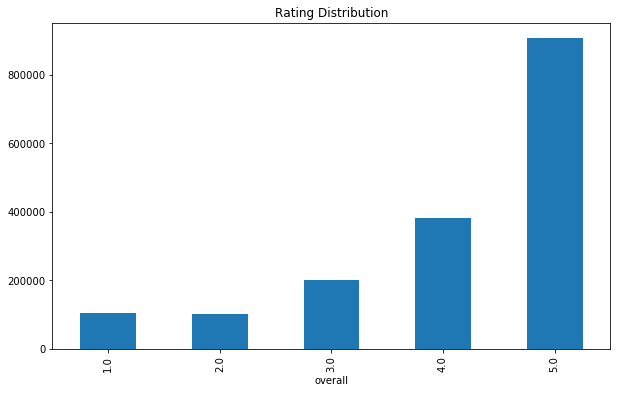

In [12]:
df.groupby('overall')['reviewerID'].count().plot(kind='bar',title='Rating Distribution',figsize=(10,6))

In [13]:
# To select a column, we index with the name of the column
df['reviewerID'].head()

0     ADZPIG9QOCDG5
1    A35947ZP82G7JH
2    A3UORV8A9D5L2E
3    A1VKW06X1O2X7V
4    A3R27T4HADWFFJ
Name: reviewerID, dtype: object

In [14]:
# Selecting multiple columns
df[['reviewerID', 'reviewerName', 'summary']].head()

,reviewerID,reviewerName,summary
0,ADZPIG9QOCDG5,"Alice L. Larson ""alice-loves-books""",good version of a classic
1,A35947ZP82G7JH,Amarah Strack,Good but not as moving
2,A3UORV8A9D5L2E,Amazon Customer,Winkler's Performance was ok at best!
3,A1VKW06X1O2X7V,"Amazon Customer ""Softmill""",It's an enjoyable twist on the classic story
4,A3R27T4HADWFFJ,BABE,Best Scrooge yet


In [15]:
# 1.2 Data Preprocessing
# To get the first 5 rows of a dataframe, we can use a slice: df[:5]
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4.0,good version of a classic,1203984000,"02 26, 2008"
1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3.0,Good but not as moving,1388361600,"12 30, 2013"
2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3.0,Winkler's Performance was ok at best!,1388361600,"12 30, 2013"
3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5.0,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008"
4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4.0,Best Scrooge yet,1387670400,"12 22, 2013"


In [16]:
# Check If Any Value is NaN in a Pandas DataFrame
df.isnull().values.any()

True

In [17]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      6076
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [18]:
# Counting cells with missing values
sum(df.isnull().values.ravel())

6076

In [19]:
# Counting rows that have missing values somewhere
sum([True for idx,row in df.iterrows() if any(row.isnull())])

6076

In [20]:
# Selecting only rows with one or more nulls
noise_data = df[df.isnull().any(axis=1)]
noise_data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
4267,A1ITR8Q69GVX7R,0767726227,NaN,"[1, 4]",There are SEVEN movies in this set:High Anxiet...,5.0,Editorial Review is incorrect...,1139529600,"02 10, 2006"
4268,A1WKD13MH7ODIW,0767726227,NaN,"[8, 20]","have left out The Producers, Mel's first and p...",3.0,the producers of this set...,1056240000,"06 22, 2003"
5513,A3IFPFKOJWSPZC,0767802497,NaN,"[0, 0]",loved this movie,5.0,Five Stars,1405728000,"07 19, 2014"
5629,A2K003H22SVV0E,0767802519,NaN,"[0, 0]",Great movie.,5.0,Five Stars,1405123200,"07 12, 2014"
6187,A25SCMROF2X6HQ,0767802594,NaN,"[5, 5]",Half a century has passed since I read this pl...,5.0,Superb movie/best from the bard,1283644800,"09 5, 2010"


In [21]:
# To get a sense for whether a column has problems, 
# I usually use .unique() to look at all its values. 
# If it's a numeric column, I'll instead plot a histogram 
# to get a sense of the distribution.
df['overall'].unique()

array([ 4.,  3.,  5.,  2.,  1.])

In [22]:
# Create a groupby object
name = df.groupby('reviewerID')

# Apply the sum function to the groupby object
test = name.mean().sort_values(by='unixReviewTime')
test.head()

,overall,unixReviewTime
reviewerID,,
A1127LKNR08JJK,4.875000,8.800488e+08
A25W58TZK09YET,4.857143,8.921170e+08
A4J3G0IR4ZRSQ,4.090909,9.019296e+08
A28BJ12568I17K,5.000000,9.021197e+08
A34SXYXTHGF3DI,4.400000,9.030010e+08


In [23]:
name = df.groupby('reviewerName')
test = name.mean().sort_values(by='unixReviewTime')
test.head()

,overall,unixReviewTime
reviewerName,,
acwpython@juno.com,4.875000,8.800488e+08
Charles Culbertson (cculbert@cfw.com),4.857143,8.921170e+08
aesenbog@ritchie.acomp.usf.edu,4.090909,9.019296e+08
Mire Uno,5.000000,9.021197e+08
yofiend@earthlink.net,4.400000,9.030010e+08


In [24]:
name = df.groupby('reviewerName')
test = name.count()
test.head()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
reviewerName,,,,,,,,
,27,27,27,27,27,27,27,27
,22,22,22,22,22,22,22,22
" 26.2 "" 26.2""",8,8,8,8,8,8,8,8
"Leah ""Leah""",45,45,45,45,45,45,45,45
TM,5,5,5,5,5,5,5,5


In [25]:
name = df.groupby('asin')
test = name.mean().sort_values(by='unixReviewTime')
test.head()

,overall,unixReviewTime
asin,,
6305462992,2.400000,950641920.0
6304123523,4.666667,952884000.0
6301910311,4.833333,953078400.0
6303854540,4.200000,955946880.0
6304756143,4.200000,962755200.0


In [26]:
# indexed_df = df.set_index(['reviewTime'])
# indexed_df[:5]

In [27]:
# Parsing Unix timestamps
df['date'] = pd.to_datetime(df['unixReviewTime'],unit='s')
indexed_df = df.set_index(['date'])
indexed_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
date,,,,,,,,,
2008-02-26,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4.0,good version of a classic,1203984000,"02 26, 2008"
2013-12-30,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3.0,Good but not as moving,1388361600,"12 30, 2013"
2013-12-30,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3.0,Winkler's Performance was ok at best!,1388361600,"12 30, 2013"
2008-02-13,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5.0,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008"
2013-12-22,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4.0,Best Scrooge yet,1387670400,"12 22, 2013"


In [28]:
ratings = []

for review in parse("reviews_Movies_and_TV_5.json.gz"):
    ratings.append(review['overall'])

print(sum(ratings) / len(ratings))

4.110648217148062


In [29]:
# ratings = []

# for review in df['overall']:
#     ratings.append(review['overall'])

# print(sum(ratings) / len(ratings))

indexed_df['overall'][:10]

date
2008-02-26    4.0
2013-12-30    3.0
2013-12-30    3.0
2008-02-13    5.0
2013-12-22    4.0
2013-11-06    5.0
2008-12-30    5.0
2009-12-15    5.0
2013-12-05    5.0
2013-09-21    5.0
Name: overall, dtype: float64

In [30]:
# data from a rating-only CSV file
path = './ratings_Movies_and_TV.csv'
only_df = pd.read_csv(path)
only_df[:10]

,A3R5OBKS7OM2IR,0000143502,5.0,1358380800
0,A3R5OBKS7OM2IR,0000143529,5.0,1380672000
1,AH3QC2PC1VTGP,0000143561,2.0,1216252800
2,A3LKP6WPMP9UKX,0000143588,5.0,1236902400
3,AVIY68KEPQ5ZD,0000143588,5.0,1232236800
4,A1CV1WROP5KTTW,0000589012,5.0,1309651200
5,AP57WZ2X4G0AA,0000589012,2.0,1366675200
6,A3NMBJ2LCRCATT,0000589012,5.0,1393804800
7,A5Y15SAOMX6XA,0000589012,2.0,1307404800
8,A3P671HJ32TCSF,0000589012,5.0,1393718400
9,A3VCKTRD24BG7K,0000589012,5.0,1378425600


In [31]:
indexed_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
date,,,,,,,,,
2008-02-26,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4.0,good version of a classic,1203984000,"02 26, 2008"
2013-12-30,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3.0,Good but not as moving,1388361600,"12 30, 2013"
2013-12-30,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3.0,Winkler's Performance was ok at best!,1388361600,"12 30, 2013"
2008-02-13,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5.0,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008"
2013-12-22,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4.0,Best Scrooge yet,1387670400,"12 22, 2013"


In [32]:
indexed_df['unixReviewTime'].head()

date
2008-02-26    1203984000
2013-12-30    1388361600
2013-12-30    1388361600
2008-02-13    1202860800
2013-12-22    1387670400
Name: unixReviewTime, dtype: int64

In [33]:
indexed_df.sort_values(by='unixReviewTime').head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
date,,,,,,,,,
1997-11-13,A1127LKNR08JJK,630174411X,acwpython@juno.com,"[0, 4]",The movie was ok but it did lack a few things....,4.0,GREAT,879379200,"11 13, 1997"
1997-11-14,A1127LKNR08JJK,0783222068,acwpython@juno.com,"[0, 0]",HA HA HA!!! THose were the first words anyone ...,5.0,Hilarious,879465600,"11 14, 1997"
1997-11-14,A1127LKNR08JJK,0767824571,acwpython@juno.com,"[0, 0]","This movie rules. It has humor, love, suspens...",5.0,Best Movie Ever!!!,879465600,"11 14, 1997"
1997-11-19,A1127LKNR08JJK,6303094880,acwpython@juno.com,"[2, 3]",This is so funny. It has a lot of good jokes ...,5.0,Awesome,879897600,"11 19, 1997"
1997-11-19,A1127LKNR08JJK,6302952727,acwpython@juno.com,"[2, 51]",THis is the shortest movie but the funniest. ...,5.0,no,879897600,"11 19, 1997"


In [34]:
indexed_df.sort_values(by='reviewTime').head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
date,,,,,,,,,
1999-01-01,AWIZSOOECU1V2,6305265623,Lou R. Rivera,"[3, 15]",The worst movie ever. Warren Beatty looks clam...,1.0,Political crap,915148800,"01 1, 1999"
1999-01-01,ALTT2Q8P0GPDD,0782008380,5kelly@internet.net,"[1, 3]",The director and producers thought it was so t...,1.0,Futile Attempt To Cover Up The Highlander II A...,915148800,"01 1, 1999"
1999-01-01,ALTT2Q8P0GPDD,0782008372,5kelly@internet.net,"[0, 1]",Here's the original fantasy/swashbuckler starr...,4.0,Great Start For Anyone Interested In The World...,915148800,"01 1, 1999"
1999-01-01,A2J905IASD9HNT,6304810997,"N. Smith ""castle_stormer""","[2, 3]",Quite possibly this film should be listed in H...,1.0,One star too generous,915148800,"01 1, 1999"
1999-01-01,A2J905IASD9HNT,6300213803,"N. Smith ""castle_stormer""","[0, 0]",Unanimously considered by most people as the b...,5.0,It has everything,915148800,"01 1, 1999"


In [35]:
sort_indexed_df = indexed_df.sort_index(axis=0)
sort_indexed_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
date,,,,,,,,,
1997-11-13,A1127LKNR08JJK,630174411X,acwpython@juno.com,"[0, 4]",The movie was ok but it did lack a few things....,4.0,GREAT,879379200,"11 13, 1997"
1997-11-14,A1127LKNR08JJK,0783222068,acwpython@juno.com,"[0, 0]",HA HA HA!!! THose were the first words anyone ...,5.0,Hilarious,879465600,"11 14, 1997"
1997-11-14,A1127LKNR08JJK,0767824571,acwpython@juno.com,"[0, 0]","This movie rules. It has humor, love, suspens...",5.0,Best Movie Ever!!!,879465600,"11 14, 1997"
1997-11-19,A1127LKNR08JJK,6303094880,acwpython@juno.com,"[2, 3]",This is so funny. It has a lot of good jokes ...,5.0,Awesome,879897600,"11 19, 1997"
1997-11-19,A1127LKNR08JJK,6302952727,acwpython@juno.com,"[2, 51]",THis is the shortest movie but the funniest. ...,5.0,no,879897600,"11 19, 1997"


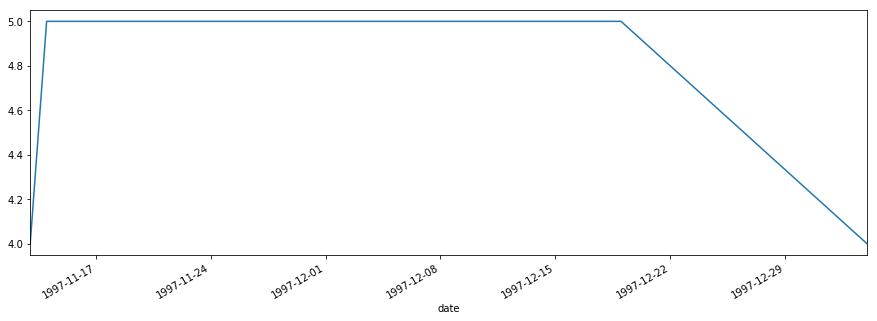

In [36]:
# indexed_df['overall'][:10].plot()
sort_indexed_df['overall'][:10].plot(figsize=(15, 5))

In [37]:
indexed_df_test = sort_indexed_df
indexed_df_test.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
date,,,,,,,,,
1997-11-13,A1127LKNR08JJK,630174411X,acwpython@juno.com,"[0, 4]",The movie was ok but it did lack a few things....,4.0,GREAT,879379200,"11 13, 1997"
1997-11-14,A1127LKNR08JJK,0783222068,acwpython@juno.com,"[0, 0]",HA HA HA!!! THose were the first words anyone ...,5.0,Hilarious,879465600,"11 14, 1997"
1997-11-14,A1127LKNR08JJK,0767824571,acwpython@juno.com,"[0, 0]","This movie rules. It has humor, love, suspens...",5.0,Best Movie Ever!!!,879465600,"11 14, 1997"
1997-11-19,A1127LKNR08JJK,6303094880,acwpython@juno.com,"[2, 3]",This is so funny. It has a lot of good jokes ...,5.0,Awesome,879897600,"11 19, 1997"
1997-11-19,A1127LKNR08JJK,6302952727,acwpython@juno.com,"[2, 51]",THis is the shortest movie but the funniest. ...,5.0,no,879897600,"11 19, 1997"


In [38]:
# indexed_df_test['overall'].plot()

In [39]:
df_day = indexed_df_test.resample('D').mean()
df_day.head()

,overall,unixReviewTime
date,,
1997-11-13,4.0,879379200.0
1997-11-14,5.0,879465600.0
1997-11-15,NaN,NaN
1997-11-16,NaN,NaN
1997-11-17,NaN,NaN


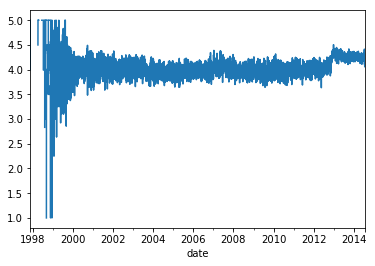

In [40]:
df_day['overall'].plot()

In [41]:
df_week = indexed_df_test.resample('W').mean()
df_week.head()

,overall,unixReviewTime
date,,
1997-11-16,4.666667,879436800.0
1997-11-23,5.000000,879897600.0
1997-11-30,NaN,NaN
1997-12-07,5.000000,881020800.0
1997-12-14,NaN,NaN


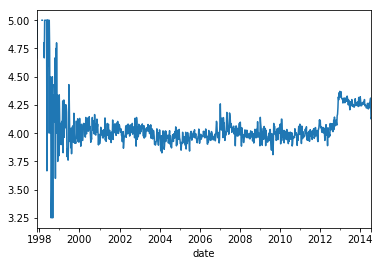

In [42]:
df_week['overall'].plot()

In [43]:
df_month = indexed_df_test.resample('M').mean()
df_month.head()

,overall,unixReviewTime
date,,
1997-11-30,4.857143,8.797001e+08
1997-12-31,5.000000,8.817552e+08
1998-01-31,4.000000,8.837856e+08
1998-02-28,5.000000,8.873496e+08
1998-03-31,4.800000,8.909050e+08


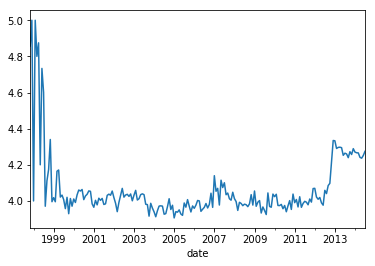

In [44]:
df_month['overall'].plot()

In [45]:
# Group by reviewerID and asin
Daily = indexed_df_test.reset_index().groupby(['reviewerID', 'asin']).mean()
del Daily['unixReviewTime']
Daily.head(10)

overall
reviewerID            asin               
A00295401U6S2UG3RAQSZ 0767015533      4.0
                      0792838084      4.0
                      6304484054      4.0
                      6305182205      4.0
                      B00004W22I      4.0
                      B005X5XIME      4.0
A00348066Q1WEW5BMESN  1558908315      5.0
                      B00009QG5O      5.0
                      B00009QG5P      5.0
                      B000F4PDF8      5.0

In [46]:
# Daily = indexed_df_test.reset_index().groupby(['reviewerName', 'asin']).mean()
# Daily.head(10)

In [47]:
# indexed_df_test.head()
# Daily = indexed_df_test.reset_index().groupby(['reviewerID','date', 'asin']).mean()
Daily = indexed_df_test.reset_index().groupby(['reviewerID','date']).mean()
del Daily['unixReviewTime']
Daily.head(30)

overall
reviewerID            date                
A00295401U6S2UG3RAQSZ 2012-11-18  4.000000
                      2012-11-23  4.000000
A00348066Q1WEW5BMESN  2013-01-01  5.000000
                      2014-02-14  5.000000
A0040548BPHKXMHH3NTI  2012-12-01  3.666667
                      2013-02-03  4.000000
                      2014-01-30  3.000000
A00438023NNXSDBGXK56L 2013-01-19  3.000000
                      2013-05-29  4.000000
                      2013-08-03  2.000000
                      2013-10-22  2.000000
                      2014-05-31  5.000000
A0048168OBFNFN7WW8XC  2013-05-09  5.000000
                      2013-10-10  5.000000
                      2013-10-11  5.000000
                      2013-12-28  5.000000
A00503563AVX48TRHJGR6 2013-01-03  4.600000
A0056274FAHZQC4N2ZN8  2012-12-17  5.000000
                      2013-04-13  5.000000
                      2013-11-02  5.000000
A0057670FKKO20E9X6XL  2013-04-29  5.000000
                      2013-06-05  4.750000
A00700212KB3K0MVESPIY 2012-12-18  5.000000
                      2013-07-20  5.000000
                      2013-11-25  5.000000
                      2013-12-03  5.000000
                      2013-12-13  5.000000
A00800615OVHYSOGUA70  2012-11-20  4.000000
                      2012-11-21  5.000000
                      2013-01-28  3.000000

In [48]:
# Select the reviewerID index
Daily.index.levels[0]

Index(['A00295401U6S2UG3RAQSZ', 'A00348066Q1WEW5BMESN', 'A0040548BPHKXMHH3NTI',
       'A00438023NNXSDBGXK56L', 'A0048168OBFNFN7WW8XC',
       'A00503563AVX48TRHJGR6', 'A0056274FAHZQC4N2ZN8', 'A0057670FKKO20E9X6XL',
       'A00700212KB3K0MVESPIY', 'A00800615OVHYSOGUA70',
       ...
       'AZZL3XXUJVJ68', 'AZZNTTHU6NNRB', 'AZZQLMNX239VT', 'AZZSKXJHRVQ5A',
       'AZZWPNME0GQZ2', 'AZZXCFBNEWIBQ', 'AZZYW4YOE1B6E', 'AZZZ159U3Q5OO',
       'AZZZA9JS7UPHO', 'AZZZMSZI9LKE6'],
      dtype='object', name='reviewerID', length=123960)

In [49]:
# Select the date index
Daily.index.levels[1]

DatetimeIndex(['1997-11-13', '1997-11-14', '1997-11-19', '1997-12-02',
               '1997-12-19', '1998-01-03', '1998-02-02', '1998-02-05',
               '1998-02-22', '1998-02-24',
               ...
               '2014-07-14', '2014-07-15', '2014-07-16', '2014-07-17',
               '2014-07-18', '2014-07-19', '2014-07-20', '2014-07-21',
               '2014-07-22', '2014-07-23'],
              dtype='datetime64[ns]', name='date', length=5799, freq=None)

In [50]:
# Select the asin index
# Daily.index.levels[2]

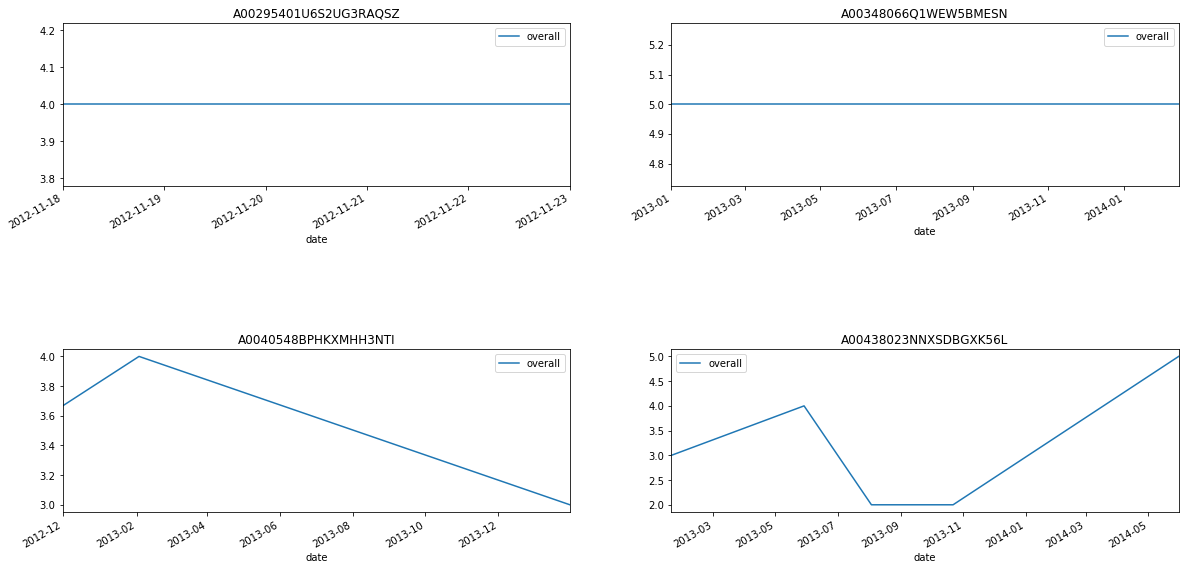

In [51]:
# Last four Graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots

Daily.loc['A00295401U6S2UG3RAQSZ']['2012':].plot(ax=axes[0,0])
Daily.loc['A00348066Q1WEW5BMESN']['2012':].plot(ax=axes[0,1])
Daily.loc['A0040548BPHKXMHH3NTI']['2012':].plot(ax=axes[1,0])
Daily.loc['A00438023NNXSDBGXK56L']['2012':].plot(ax=axes[1,1])
# Add titles
axes[0,0].set_title('A00295401U6S2UG3RAQSZ')
axes[0,1].set_title('A00348066Q1WEW5BMESN')
axes[1,0].set_title('A0040548BPHKXMHH3NTI')
axes[1,1].set_title('A00438023NNXSDBGXK56L');

#2 Modeling

In [52]:
data = indexed_df_test[['reviewText', 'overall']]
data.head()
data.info()
len(data)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1697533 entries, 1997-11-13 to 2014-07-23
Data columns (total 2 columns):
reviewText    object
overall       float64
dtypes: float64(1), object(1)
memory usage: 78.9+ MB


1697533

In [53]:
def splitTrainTest(data,percent_train):
    n = int(len(data)*percent_train)
    train = data[:n]
    test = data[n:]
    return train, test
train, test = splitTrainTest(data, 0.75)
print('Train Data: ', len(train))
print('Test Data: ', len(test))
print('Total Data: ', len(train)+len(test))

Train Data:  1273149
Test Data:  424384
Total Data:  1697533


In [54]:
# train.head()
# from IPython.display import display
display(train.head())
display(train.tail())

,reviewText,overall
date,,
1997-11-13,The movie was ok but it did lack a few things....,4.0
1997-11-14,HA HA HA!!! THose were the first words anyone ...,5.0
1997-11-14,"This movie rules. It has humor, love, suspens...",5.0
1997-11-19,This is so funny. It has a lot of good jokes ...,5.0
1997-11-19,THis is the shortest movie but the funniest. ...,5.0


,reviewText,overall
date,,
2013-07-08,Classic Stephen king just cleaned up and upsca...,5.0
2013-07-08,"Love these movies, and got a great deal. Comes...",5.0
2013-07-08,I saw the first movie with this title and it w...,5.0
2013-07-08,The first 2-3 episodes of Homeland were some o...,3.0
2013-07-08,On the dark side. Interesting and enjoyable b...,3.0


In [55]:
display(test.head())
display(test.tail())

,reviewText,overall
date,,
2013-07-08,"A seriously thin, mindless exercise that has n...",3.0
2013-07-08,"As you may have noticed, the reviews of this f...",5.0
2013-07-08,I can watch this movie over and over and not t...,4.0
2013-07-08,This movie will surely rank as one of Ti Lung'...,4.0
2013-07-08,Highly recommended to anyone who loves a good ...,5.0


,reviewText,overall
date,,
2014-07-23,BAD WORDS the title says it so you should be a...,4.0
2014-07-23,Loved the movie Saw Dragon 2 in theaters as w...,5.0
2014-07-23,What a great horror movie. Not over the edge ...,5.0
2014-07-23,Was glad I rented...I wasn't able to see in th...,5.0
2014-07-23,Loved it....not a bad performance in the bunch...,5.0


In [56]:
text = train['reviewText'][0]
text

'The movie was ok but it did lack a few things.  The movie was very funny but its humor was based on dressing like a nun.  But if you like that sort of thing or a big Eric Idle Fan (Monty Python) this is a must get.  END'

In [57]:
#preprocessing steps

#stemmer = PorterStemmer()
lemmatizer = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
translation = str.maketrans(string.punctuation,' '*len(string.punctuation))

def preprocessing(line):
    tokens=[]
    line = line.translate(translation)
    line = nltk.word_tokenize(line.lower())
    for t in line:
        #if(t not in stop):
            #stemmed = stemmer.stem(t)
        stemmed = lemmatizer.lemmatize(t)
        tokens.append(stemmed)
    return ' '.join(tokens)

In [58]:
# preprocessing(text)
# train['reviewText'][0] = preprocessing(train['reviewText'][0])
t = train[0:1]
t

,reviewText,overall
date,,
1997-11-13,The movie was ok but it did lack a few things....,4.0


In [59]:
# t['cleanText'] = pd.Series(preprocessing(t['reviewText']))
# t.assign(cleanText = preprocessing(t['reviewText']))
a = t['reviewText']
a

date
1997-11-13    The movie was ok but it did lack a few things....
Name: reviewText, dtype: object

In [60]:
for index, row in train.head(2).iterrows():
    print(index)
    print(row)

1997-11-13 00:00:00
reviewText    The movie was ok but it did lack a few things....
overall                                                       4
Name: 1997-11-13 00:00:00, dtype: object
1997-11-14 00:00:00
reviewText    HA HA HA!!! THose were the first words anyone ...
overall                                                       5
Name: 1997-11-14 00:00:00, dtype: object
